[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
D:\AI-Intern-at-CoreTech-Innovation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI-Intern-at-CoreTech-Innovation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI-In


Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         2
     Neutral       0.50      0.50      0.50         2
    Positive       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.39         6
weighted avg       0.33      0.50      0.39         6

Accuracy: 0.5


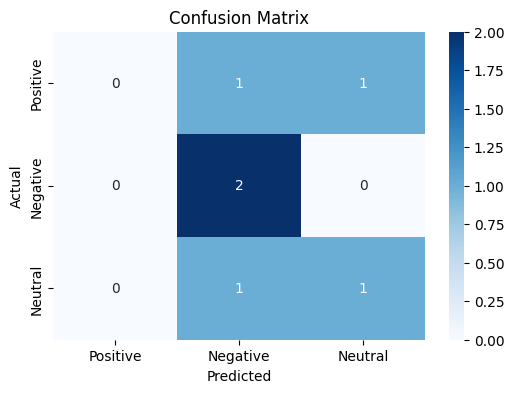

Text: I really enjoyed the new update! --> Sentiment: Positive
Text: This is so frustrating and annoying. --> Sentiment: Negative
Text: It's an average day, nothing great. --> Sentiment: Neutral


In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (only first time)
nltk.download("punkt")
nltk.download("stopwords")

# -----------------------------
# 1. Create a small dataset
# -----------------------------
data = {
    "text": [
        "I love this product, it's amazing!",
        "This is the worst experience ever.",
        "The service was okay, nothing special.",
        "Absolutely fantastic performance!",
        "I hate waiting in long queues.",
        "The food was delicious and fresh.",
        "Not bad, but could be better.",
        "Terrible customer support, very rude.",
        "I am so happy with my purchase.",
        "The movie was boring and too long.",
        "The laptop works perfectly fine.",
        "I don’t like the taste of this juice.",
        "Pretty decent quality for the price.",
        "Horrible! I will never come back.",
        "The weather is fine today.",
        "I feel neutral about this situation.",
        "Such a wonderful and delightful trip!",
        "The delivery was late and disappointing.",
        "I’m excited to use this new phone.",
        "It’s just okay, not good not bad."
    ],
    "label": [
        "Positive", "Negative", "Neutral", "Positive", "Negative",
        "Positive", "Neutral", "Negative", "Positive", "Negative",
        "Positive", "Negative", "Neutral", "Negative", "Neutral",
        "Neutral", "Positive", "Negative", "Positive", "Neutral"
    ]
}

df = pd.DataFrame(data)

# -----------------------------
# 2. Preprocessing function
# -----------------------------
stop_words = set(stopwords.words("english"))

def preprocess(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess)

# -----------------------------
# 3. Split dataset
# -----------------------------
X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# 4. Model pipeline (TF-IDF + Naive Bayes)
# -----------------------------
model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative", "Neutral"])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive","Negative","Neutral"], yticklabels=["Positive","Negative","Neutral"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 6. Test on new sentences
# -----------------------------
test_sentences = [
    "I really enjoyed the new update!",
    "This is so frustrating and annoying.",
    "It's an average day, nothing great.",
]

predictions = model.predict(test_sentences)

for sent, pred in zip(test_sentences, predictions):
    print(f"Text: {sent} --> Sentiment: {pred}")
